# AFIT Wrapped 2022

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm
from IPython.display import Markdown as md

In [83]:
# Parse the conversation. First into lines
# convo_fname = 'convo.txt'
# with open(convo_fname, 'r') as f:
#     lines = f.readlines()
#     lines = [line.strip() for line in lines]

# df = pd.DataFrame(columns=['date', 'time', 'author', 'message'])

# for line in tqdm(lines):
#     # 11/04/2022, 13:09 - Fco: jajajajajjajajjajajajajaja

#     if line.startswith('['):
#         continue
#     try:
#         date = re.search(r'\d{2}/\d{2}/\d{4}', line).group()
#         time = re.search(r'\d{2}:\d{2}', line).group()
#         author = re.search(r'(?<=- )\w+', line).group()
#         message = re.search(r'(?<=: ).*', line).group()
#     except:
#         continue

#     row = pd.DataFrame([[date, time, author, message]], columns=['date', 'time', 'author', 'message'])
#     df = pd.concat([df, row], ignore_index=True)


In [84]:
# df.to_csv('convo.csv', index=False)
df = pd.read_csv('convo.csv')
# SUmmary of the df
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79998 entries, 0 to 79997
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     79998 non-null  object
 1   time     79998 non-null  object
 2   author   79998 non-null  object
 3   message  79575 non-null  object
dtypes: object(4)
memory usage: 2.4+ MB


,date,time,author,message
0,11/04/2022,13:05,Andrea,tengo ganas de que pruebes la otra tosta de la...
1,11/04/2022,13:05,Fco,digo el popper en el centro que como que no pe...
2,11/04/2022,13:05,Fco,anda que noo
3,11/04/2022,13:06,Fco,no me vistee
4,11/04/2022,13:06,Andrea,ahhhhhh


In [92]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['hour'] = df['time'].str.split(':').str[0].astype(int)
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['weekday_name'] = df['date'].dt.day_name()
df['week_number'] = df['date'].dt.isocalendar().week
df['weekday_name'] = df['weekday_name'].replace({'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles', 'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado', 'Sunday': 'Domingo'})

AttributeError: Can only use .str accessor with string values!

In [ ]:
print(df.head())

        date      time  author  \
0 2022-04-11  13:05:00  Andrea   
1 2022-04-11  13:05:00     Fco   
2 2022-04-11  13:05:00     Fco   
3 2022-04-11  13:06:00     Fco   
4 2022-04-11  13:06:00  Andrea   

                                             message  hour  day  month  year  \
0  tengo ganas de que pruebes la otra tosta de la...     0   11      4  2022   
1  digo el popper en el centro que como que no pe...     0   11      4  2022   
2                                       anda que noo     0   11      4  2022   
3                                       no me vistee     0   11      4  2022   
4                                            ahhhhhh     0   11      4  2022   

  weekday_name  week_number  word_count  response_time prev_author  
0        Lunes           15        11.0            NaN        None  
1        Lunes           15        11.0            0.0      Andrea  
2        Lunes           15         3.0            0.0         Fco  
3        Lunes           15         3.

In [ ]:
users = df['author'].unique()

In [ ]:
# First day of the chat and last day of the chat
first_day = df['date'].min().strftime('%d/%m/%Y')
last_day = df['date'].max().strftime('%d/%m/%Y')

md(f"Hemos recogido todos los mensajes comprendidos entre el {first_day} y el {last_day}. Por motivos de WhatsApp, no podemos acceder a los mensajes anteriores a esa fecha.")

Hemos recogido todos los mensajes comprendidos entre el 11/04/2022 y el 31/12/2022. Por motivos de WhatsApp, no podemos acceder a los mensajes anteriores a esa fecha.

## Mirando un poco por encima...

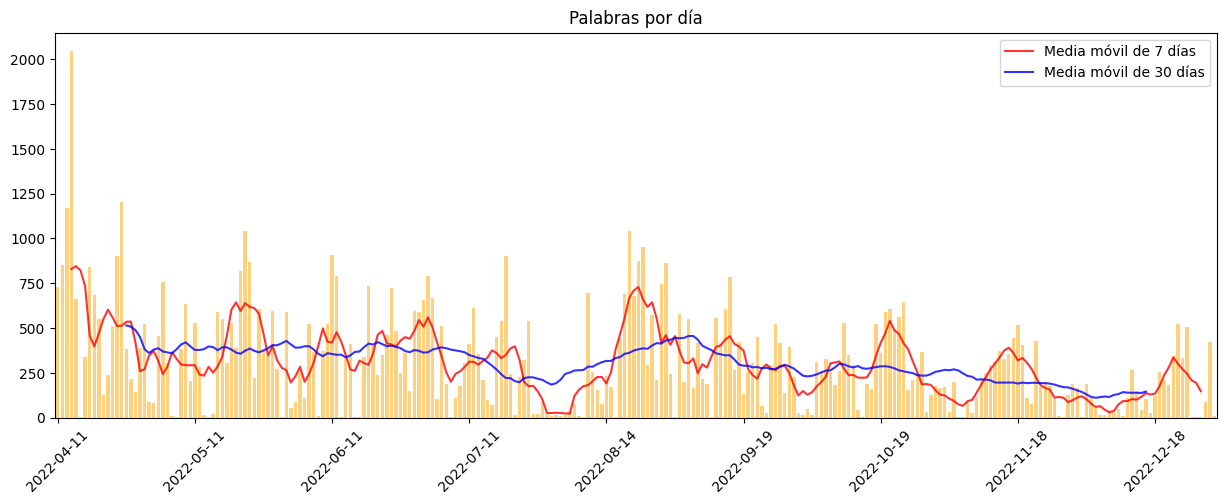

In [ ]:
# Bar plot of words per day. Only the bars, no data.
df['word_count'] = df['message'].str.split().str.len()
x = df['date'].dt.date.value_counts().sort_index().index
y = df['date'].dt.date.value_counts().sort_index().values
roll7 = np.convolve(y, np.ones(7)/7, mode='valid')
roll30 = np.convolve(y, np.ones(30)/30, mode='valid')

# Date ticks only one per month
ax = df['date'].dt.date.value_counts().sort_index().plot(kind='bar', figsize=(15, 5), color='orange', alpha=0.5, width=0.75)
ax.set_xticks(range(0, len(x), 30))
ax.set_xticklabels(x[::30], rotation=45)

# Add rolling average of 7 days and 30 days
plt.plot(range(3, len(x)-3), roll7, color='red', linewidth=1.5, alpha=0.8)
# Remove one element from the rolling average of 30 days to match the length of the rolling average of 7 days
plt.plot(range(15, len(x)-15), roll30[:-1], color='blue', linewidth=1.5, alpha=0.8)

# Legend of rolling average
plt.legend(['Media móvil de 7 días', 'Media móvil de 30 días'])

plt.title('Palabras por día')
plt.show()

## ¿Cuántos mensajes ha enviado cada uno?

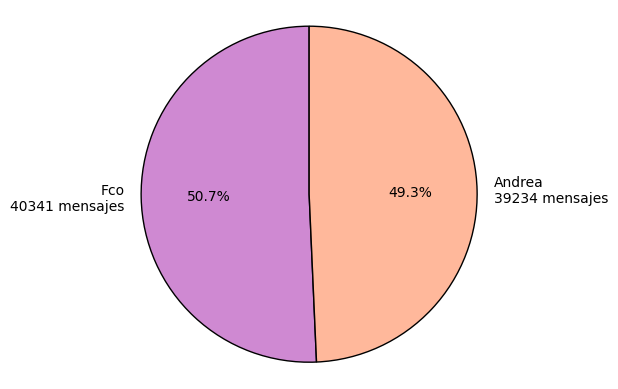

In [ ]:
# Number of messages per user and its percentage
x = df.groupby('author')['message'].count().reset_index()
x['percentage'] = x['message'] / x['message'].sum() * 100
x = x.sort_values(by='message', ascending=False)
x = x.reset_index(drop=True)
x['message'] = x['message'].astype(int)
x['percentage'] = x['percentage'].round(2)

# Pie chart
# Label is the author, new line and its percentage new line and number of messages
labels = x['author'] + '\n' + x['message'].astype(str) + ' mensajes'
sizes = x['percentage']

fig1, ax1 = plt.subplots()
colors = ['#BF61C4BF', '#FFA07ABF']
# Colors are orange and blue at .7 opacity
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
# Md total de mensajes enviados
# Mean of messages per day
avg_msgs_per_day = df['date'].dt.date.value_counts().mean()
md(f"En total, se han enviado {x['message'].sum()} mensajes. El que más mensajes ha enviado es {x['author'][0]} con un {x['percentage'][0]}% de los mensajes totales, mientras que {x['author'][len(x)-1]}, ha enviado un {x['percentage'][len(x)-1]}% de los mensajes totales. De media, se envían {avg_msgs_per_day:.2f} mensajes por día.")

En total, se han enviado 79575 mensajes. El que más mensajes ha enviado es Fco con un 50.7% de los mensajes totales, mientras que Andrea, ha enviado un 49.3% de los mensajes totales. De media, se envían 314.95 mensajes por día.

## ¿Y cuántas palabras ha escrito cada uno?

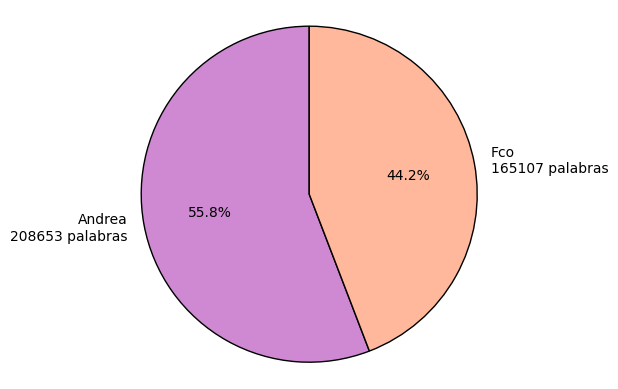

In [ ]:
# Count number of words per message
x = df.groupby('author')['word_count'].sum().reset_index()
x['percentage'] = x['word_count'] / x['word_count'].sum() * 100
x = x.sort_values(by='word_count', ascending=False)
x = x.reset_index(drop=True)
x['word_count'] = x['word_count'].astype(int)
x['percentage'] = x['percentage'].round(2)

labels = x['author'] + '\n' + x['word_count'].astype(str) + ' palabras'
sizes = x['percentage']

fig1, ax1 = plt.subplots()
colors = ['#BF61C4BF', '#FFA07ABF']
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


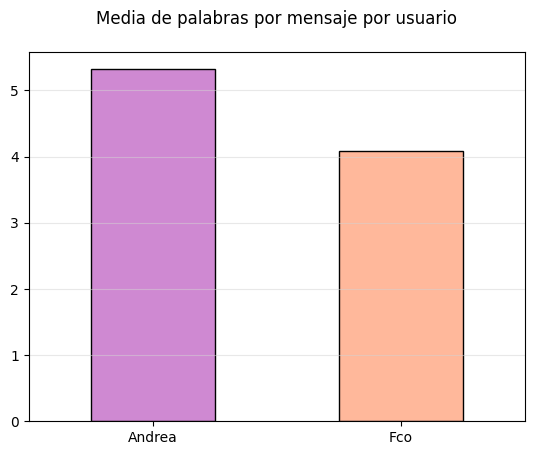

In [ ]:
# Media de palabras por mensaje por usuario
x = df.groupby('author')['word_count'].mean().reset_index()
x['word_count'] = x['word_count'].round(2)
x = x.sort_values(by='word_count', ascending=False)
x = x.reset_index(drop=True)

# Bar chart. Default bar chart
ax = x.plot.bar(x='author', y='word_count', rot=0, color=colors, edgecolor='black')
ax.set_xlabel(None)
ax.legend().set_visible(False)
ax.set_title("Media de palabras por mensaje por usuario", loc='center', pad=20)
# Print horizontal lines at each tick
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

plt.show()


## ¿Cuántos mensajes seguidos enviamos cada uno?

In [ ]:
# Get the "clusters" of messages sent continuously by the same user
# Traverse the dataframe and check if the next message is from the same user
# Create a dict of the form {author: {cluster_number: [length_of_msg1, length_of_msg2, ...]}}

clusters = {}
for i in range(len(df)-1):
    if df['author'][i] == df['author'][i+1]:
        if df['author'][i] in clusters:
            if 'cluster' in clusters[df['author'][i]]:
                clusters[df['author'][i]]['cluster'] += 1
                clusters[df['author'][i]][clusters[df['author'][i]]['cluster']] = [df['word_count'][i]]
            else:
                clusters[df['author'][i]]['cluster'] = 1
                clusters[df['author'][i]][clusters[df['author'][i]]['cluster']] = [df['word_count'][i]]
        else:
            clusters[df['author'][i]] = {}
            clusters[df['author'][i]]['cluster'] = 1
            clusters[df['author'][i]][clusters[df['author'][i]]['cluster']] = [df['word_count'][i]]
    else:
        if df['author'][i] in clusters:
            if 'cluster' in clusters[df['author'][i]]:
                clusters[df['author'][i]][clusters[df['author'][i]]['cluster']].append(df['word_count'][i])
            else:
                clusters[df['author'][i]]['cluster'] = 1
                clusters[df['author'][i]][clusters[df['author'][i]]['cluster']] = [df['word_count'][i]]
        else:
            clusters[df['author'][i]] = {}
            clusters[df['author'][i]]['cluster'] = 1
            clusters[df['author'][i]][clusters[df['author'][i]]['cluster']] = [df['word_count'][i]]


In [ ]:
# Size of the clusters
cluster_sizes = {}

for user in clusters:
    cluster_sizes[user] = {}
    for cluster in clusters[user]:
        if cluster != 'cluster':
            cluster_sizes[user][cluster] = len(clusters[user][cluster])


Un cluster es un grupo o conjunto de elementos que tienen alguna característica en común. En este caso, los clusters que se han creado son conjuntos de mensajes que han sido enviados de forma consecutiva por el mismo usuario. Por ejemplo, si un usuario envía tres mensajes seguidos, estos tres mensajes forman parte del mismo cluster.

Como vemos, ambos somos iguales en este sentido.

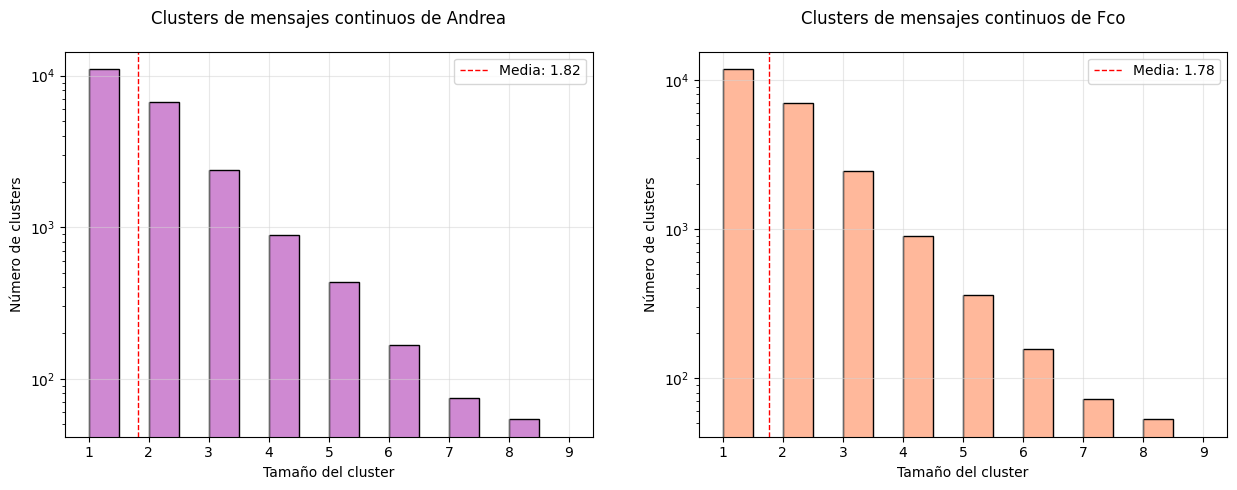

In [ ]:
# Plot histogram of cluster sizes. Add ticks for each bar.
# Add a mean line

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i, user in enumerate(users):
    ax = axes[i]
    ax.hist(cluster_sizes[user].values(), bins=range(1, 10), edgecolor='black', color=colors[i], width=0.5, log=True)
    ax.set_xticks(range(1, 10))
    ax.set_title(f"Clusters de mensajes continuos de {user}", loc='center', pad=20)
    ax.set_xlabel("Tamaño del cluster")
    ax.set_ylabel("Número de clusters")
    ax.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

    mean = np.mean(list(cluster_sizes[user].values()))
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1)
    # Print the mean in the legend
    ax.legend([f"Media: {mean:.2f}"], loc='upper right')
    


plt.show()

## ¿Cuánto hablamos....

### ...por día?

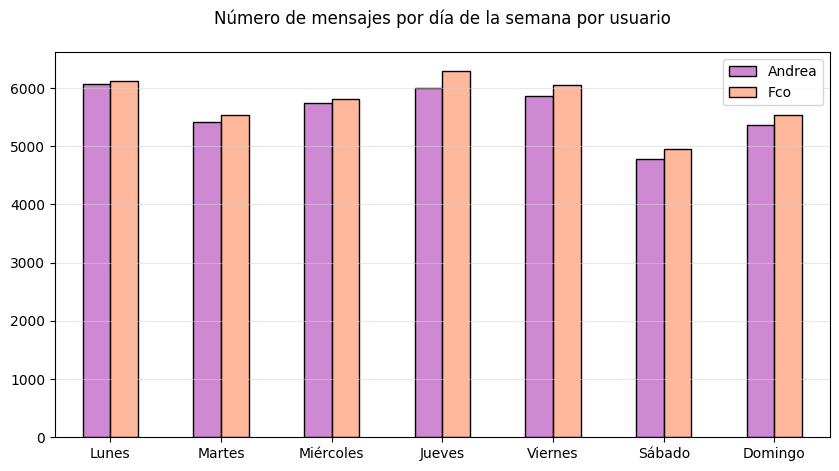

In [ ]:
# Number of messages per day of the week per user
x = df.groupby(['author', 'weekday_name'])['message'].count().reset_index()
x = x.pivot(index='weekday_name', columns='author', values='message')
# Order days of the week
x = x.reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

# Bar chart. Default bar chart
ax = x.plot.bar(rot=0, color=colors, edgecolor='black', figsize=(10, 5))
ax.set_xlabel(None)
ax.set_title("Número de mensajes por día de la semana por usuario", loc='center', pad=20)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
# Remove title of legend
ax.legend().set_title(None)

plt.show()


### ...y por hora?

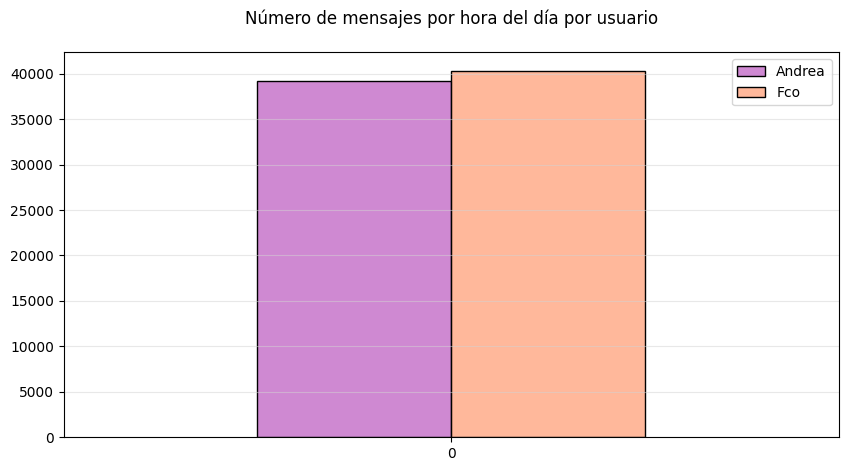

In [ ]:
# Per hour of the day
x = df.groupby(['author', 'hour'])['message'].count().reset_index()
x = x.pivot(index='hour', columns='author', values='message')

# Bar chart. Default bar chart
ax = x.plot.bar(rot=0, color=colors, edgecolor='black', figsize=(10, 5))
ax.set_xlabel(None)
ax.set_title("Número de mensajes por hora del día por usuario", loc='center', pad=20)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
# Remove title of legend
ax.legend().set_title(None)

plt.show()



## ¿Cuánto tardamos en responder?

In [ ]:
# Create a column of diff time between messages. Between message n and n-1
df['response_time'] = df['date'].diff().dt.total_seconds()/3600

# Create a column with the previous author
df['prev_author'] = df['author'].shift(1)

# Filter the rows where the previous author is different from the current one
df_filtered = df[df['prev_author'] != df['author']]

# Get the response time for each user. Save the array
response_times = {}
for user in users:
    response_times[user] = df_filtered[df_filtered['author'] == user]['response_time'].values
    # Remove values > 24 hours
    response_times[user] = response_times[user][response_times[user] < 24]

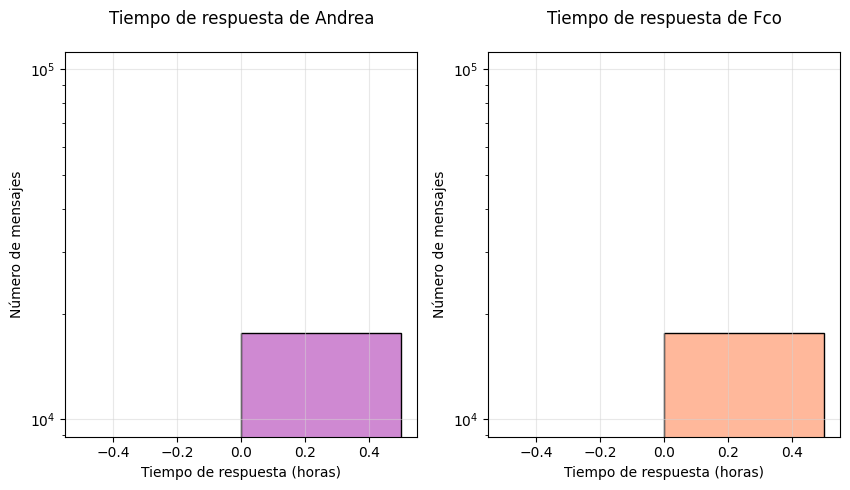

In [ ]:
# Create a plot with two columns and one row
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Each subplot is an histogram with the response times for each user. 20 bins max per subplot, number of messages is log
for i, user in enumerate(users):
    ax = axes[i]
    ax.hist(response_times[user], bins=20, edgecolor='black', color=colors[i], width=0.5, log=True)
    ax.set_title(f"Tiempo de respuesta de {user}", loc='center', pad=20)
    ax.set_xlabel("Tiempo de respuesta (horas)")
    ax.set_ylabel("Número de mensajes")
    ax.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    

plt.show()


### ¿Y cuánto tardamos en las primeras 6h?

In [ ]:
# Discretize function. Input interval in minutes. Output 

In [ ]:
# Less than 6h in minutes
df_less_6h = df_filtered[df_filtered['response_time'] < 6].copy()
df_less_6h['response_time'] = df_less_6h['response_time']*60

# Discretize the response time in intervals of 10 minutes


## ¿Qué palabras usamos más?

In [ ]:
# Wordcloud in spanish

import nltk
from nltk.corpus import stopwords

ModuleNotFoundError: No module named 'nltk'